**Ejercicio 2.**

Un quiosquero vende periódicos a 1.10 euros cada uno.Cada periódico le cuesta al quiosquero 0.90 euros. Las ventas de periódicos del quiosquero a partir de su experiencia se refeja en la tabla siguiente:

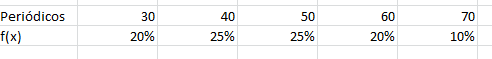

La tabla recoge por ejemplo que el 20% del tiempo las ventas han sido de 30 periódicos.Teniendo en cuenta el coste de 0.20 euros por venta perdida y el coste de 0.10 euros por el reciclaje de cada periódico no vendido, determine el beneficio promedio diario  si pide 50 periódicos cada día.

(a) Por simulación

Distribución acumulada

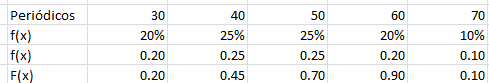

Intervalos.

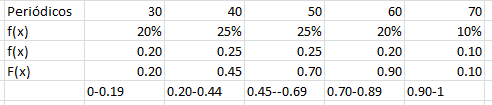


In [15]:
import numpy as np
import random
import matplotlib.pyplot as plt

Generamos los números aleatorios

In [16]:
def ventas_sim():
    ventas=0
    u = random.random()
    if 0.0 <= u < 0.20:
        ventas = 30
    elif 0.20 <= u < 0.45:
        ventas = 40
    elif 0.45 <= u < 0.70:
        ventas = 50
    elif 0.70 <= u < 0.90:
        ventas = 60
    elif 0.90 <= u <= 1.00:
        ventas = 70
    return ventas

Calculamos el beneficio.

In [17]:
def beneficio(pedido):
    ben = 0
    ventas_reales = 0
    ventas_perdidas = 0
    no_vendidos = 0
    vs = ventas_sim()
    
    if vs > pedido:
        ventas_reales = pedido
        ventas_perdidas = vs - pedido
        no_vendidos = 0
        
    else:
        ventas_reales = vs
        ventas_perdidas = 0
        no_vendidos = pedido - ventas_reales
    
    ben = 1.10*ventas_reales - 0.90*pedido - 0.10*no_vendidos - 0.20*ventas_perdidas
    return ben

In [18]:
beneficio(50)

8.000000000000007

In [19]:
def simulacion(n):
    L=[]
    benef = 0
    for i in range(n):
        benef += beneficio(50)
        L.append(benef/(i+1))
    return L

In [20]:
X=simulacion(500)

Obtenemos la gráfica

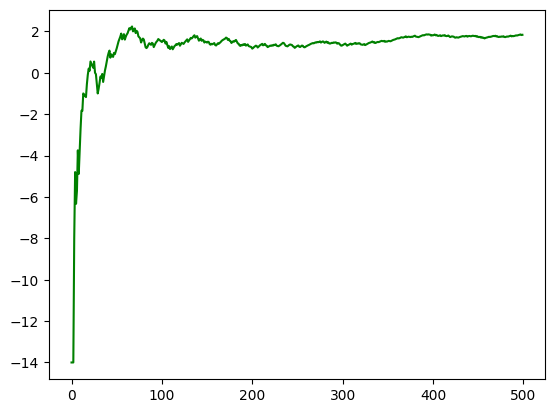

In [21]:
plt.plot(X, color="green")
plt.show() 

Calculamos la media.

In [22]:
np.mean(X)

1.2302365939733313

Repetimos el modelo n veces.

In [23]:
def modelo(n):
    lista=[]
    for i in range(n):
        s = simulacion(500)
        lista.append(np.mean(s))
    return lista

In [24]:
Y=modelo(40)

In [25]:
print(np.mean(Y), np.std(Y))

1.3622842260333168 0.5011273181036895


Obtenemos la gráfica

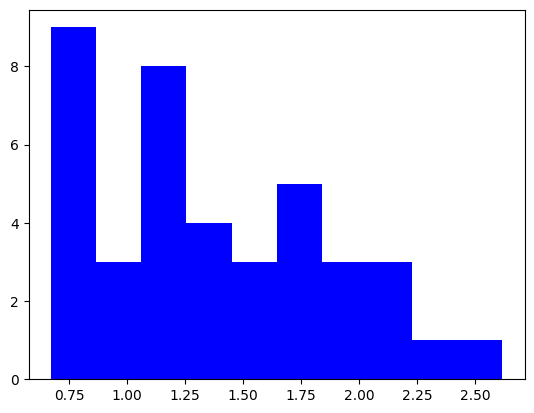

In [26]:
plt.hist(Y, color="Blue") 
plt.show() 

Calculamos la media y la desviación estandar

In [27]:
print(np.mean(Y), np.std(Y))

1.3622842260333168 0.5011273181036895


Calculamos el intervalo de confianza

In [28]:
np.mean(Y) - 1.96*np.std(Y)/np.sqrt(50), np.mean(Y) + 1.96*np.std(Y)/np.sqrt(50)

(1.2233788202846896, 1.501189631781944)

(b) Analíticamente.

Utilizamos la tabla de los intervalos.


Generamos números aleatorios con la calculadora

0.24

0.93

0.52

0.86

0.95

0.19

0.30

0.48

0.97

0.24

Simulamos las ventas de un día y calculamos el beneficio

Utilizamos la  formula para calcular el beneficio
$$B=(P_u*V_r)-(C_u*P)-(C_{ur}*P_{n})-(C_{vp}*V_P)$$
$P_u=$Precio unitario de venta

$V_r=$Ventas reales

$C_u=$Costo unitario de adquisición

$P=$Pedido

$C_{ur}=$Coste unitario de reciclaje

$P_n=$ Periodicos no vendidos

$C_{vp}=$Coste venta perdida

$V_p=$Ventas perdidas

Si **Ventas simuladas** $>$ **Pedido**

Ventas reales=Pedido

Ventas perdidas= Ventas simuladas-Pedido

Si **Ventas simuladas** $\leq$ **Pedido**

Ventas reales=Ventas simuladas
Ventas perdidas=0
Periódicos no vendidos=Pedido-Ventas reales

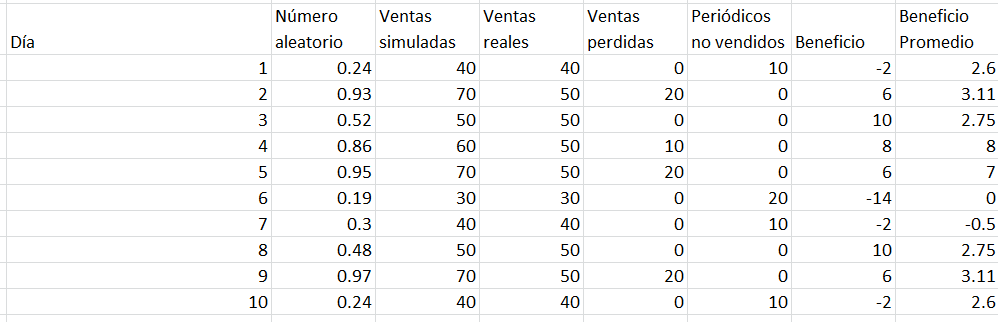

Replicamos el modelo 40 veces, y obtenemos:

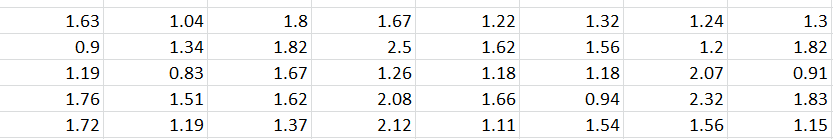

Calculamos la media y la varianza

$\bar{x}=1.49$

$sd=0.397$

Obtenemos el intervalo de confianza con un nivel de aceptación del 95%

$$\therefore 0.72\leq\mu\leq2.27$$

(c) Determine por simulación  el pedido de periódicos que optimiza el beneficio.


In [29]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [30]:
def ventas_sim():
    ventas=0  
    u = random.random() 
    if 0.0 <= u < 0.20:
        ventas = 30
    elif 0.20 <= u < 0.45:
        ventas = 40
    elif 0.45 <= u < 0.70:
        ventas = 50
    elif 0.70 <= u < 0.90:
        ventas = 60
    elif 0.90 <= u <= 1.00:
        ventas = 70
    return ventas 
     

In [31]:
def beneficio(pedido):
    ben = 0
    ventas_reales = 0
    ventas_perdidas = 0
    no_vendidos = 0
    vs = ventas_sim()
    if vs > pedido:
        ventas_reales = pedido
        ventas_perdidas = vs - pedido
        no_vendidos = 0
    else:
        ventas_reales = vs
        ventas_perdidas = 0
        no_vendidos = pedido - ventas_reales
    ben = 1.10*ventas_reales - 0.90*pedido - 0.10*no_vendidos - 0.20*ventas_perdidas
    return ben 

Para optimizar el pedido:

In [32]:
beneficio(80)

-44.0

In [33]:
def simulacion(n):
    L=[]
    benef = 0  
    for i in range(n):
        benef += beneficio(50)
        L.append(benef/(i+1))
    return L # retornamos la lista con los beneficios promedio para cada muestra
     

In [34]:
graf=simulacion(800)

Obtenemos la gráfica

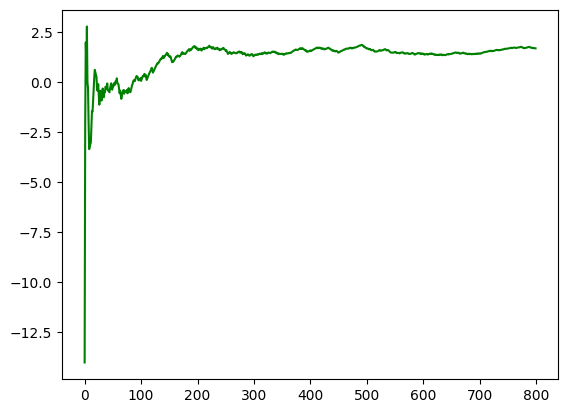

In [35]:
plt.plot(graf, color="green") 
plt.show() 

Calculamos la media

In [36]:
np.mean(graf)

1.2495894215832202

Beneficios

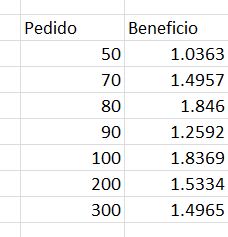

En la tabla podemos observar que el beneficio es mayor cuando se realiza un pedido de 80 periodicos.